Project undertaken by Digant Singh, 2024

# Penguin Classification Project

## Overview
This project focuses on classifying penguins into two species (Adelie and Gentoo) based on various physical measurements. The dataset used is the Palmer Penguins dataset, which includes features like bill length, bill depth, flipper length, and body mass.

## Goal
The main goal of this project is to build a classification model that accurately predicts the species of a penguin given its physical measurements. The ultimate aim is to get a model that is able to predict the penguins with a 100% accuracy. 

## Tools and Libraries
- Python
- Notebooks (iPythonNotebook)
- Scikit-learn
- Matplotlib


In [2]:
# importing the libraries required for data-frame building and manipulation

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# Data Exploration

## Dataset
We are working with the Palmer Penguins dataset, which contains measurements for penguins of two different species.

### Features
- Bill Length
- Bill Depth
- Flipper Length
- Body Mass

### Target Variable
- Species (Adelie, Gentoo)

## Summary Statistics
Explore the basic statistics of the dataset to understand the distribution and characteristics of the features.

## Visualizations
Include visualizations such as histograms and correlation matrices to gain insights into the data distribution and relationships.


In [3]:
# creating the data-frame using pandas
df = pd.read_csv('penguins_binary_classification.csv')

# checking how the indexing and labelling is working
# if the labelling doesn't match up, we will have to change it
df.sample(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
104,Adelie,Biscoe,39.7,18.9,184.0,3550.0,2009
246,Gentoo,Biscoe,50.8,15.7,226.0,5200.0,2009
14,Adelie,Torgersen,36.6,17.8,185.0,3700.0,2007
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2007
90,Adelie,Dream,41.1,18.1,205.0,4300.0,2008
174,Gentoo,Biscoe,46.3,15.8,215.0,5050.0,2007
122,Adelie,Torgersen,41.4,18.5,202.0,3875.0,2009
170,Gentoo,Biscoe,48.7,15.1,222.0,5350.0,2007
46,Adelie,Dream,37.5,18.9,179.0,2975.0,2007
210,Gentoo,Biscoe,50.4,15.3,224.0,5550.0,2008


In [4]:
# just to see how the dataset looks
df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,2007
5,Adelie,Torgersen,38.9,17.8,181.0,3625.0,2007
6,Adelie,Torgersen,39.2,19.6,195.0,4675.0,2007
7,Adelie,Torgersen,34.1,18.1,193.0,3475.0,2007
8,Adelie,Torgersen,42.0,20.2,190.0,4250.0,2007
9,Adelie,Torgersen,37.8,17.1,186.0,3300.0,2007


**Handling Missing Values**
Check for and handle any missing values in the dataset.

In [5]:
# check the null values 
# if they do come up, we will use the appropraite data values
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
year                 0
dtype: int64

Exploring the data types of the datasets

In [6]:
df['island'].value_counts()

island
Biscoe       167
Dream         56
Torgersen     51
Name: count, dtype: int64

In [19]:
df['year'].value_counts()

year
2008    96
2009    95
2007    83
Name: count, dtype: int64

In [7]:
# the data types of the data columns
# helps in building the correlation matrix
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            274 non-null    object 
 1   island             274 non-null    object 
 2   bill_length_mm     274 non-null    float64
 3   bill_depth_mm      274 non-null    float64
 4   flipper_length_mm  274 non-null    float64
 5   body_mass_g        274 non-null    float64
 6   year               274 non-null    int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 15.1+ KB


In [8]:
# this is just for the metrics
# doesn't really work for the classification model
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,274.000000,274.000000,274.000000,274.000000,274.000000
mean,42.702920,16.836131,202.178832,4318.065693,2008.043796
std,5.195566,2.013410,15.047938,835.933105,0.806281
min,32.100000,13.100000,172.000000,2850.000000,2007.000000
25%,38.350000,15.000000,190.000000,3600.000000,2007.000000
50%,42.000000,17.000000,198.000000,4262.500000,2008.000000
75%,46.675000,18.500000,215.000000,4950.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [9]:
# checking how many species are present in the dataset
df['species'].value_counts()

species
Adelie    151
Gentoo    123
Name: count, dtype: int64

In [10]:
# for my curiosity, just wanted to check how many islands present
df['island'].value_counts()

island
Biscoe       167
Dream         56
Torgersen     51
Name: count, dtype: int64

# Data Preprocessing

## Encoding Categorical Variables
Encode categorical variables, such as the 'Species' column, using LabelEncoder from '*sklearn.preprocessing*' encoding methods. We will use the '*LabelEncoder*' to encode the 'species' and 'island' catgories.

## Feature Scaling
Apply feature scaling to ensure that all features have a similar scale, if necessary. In this case, it is not required. It would have been a simple case, such as the length being in milimeter and centimeter for variour parameters, which it is not in this case.


<Axes: >

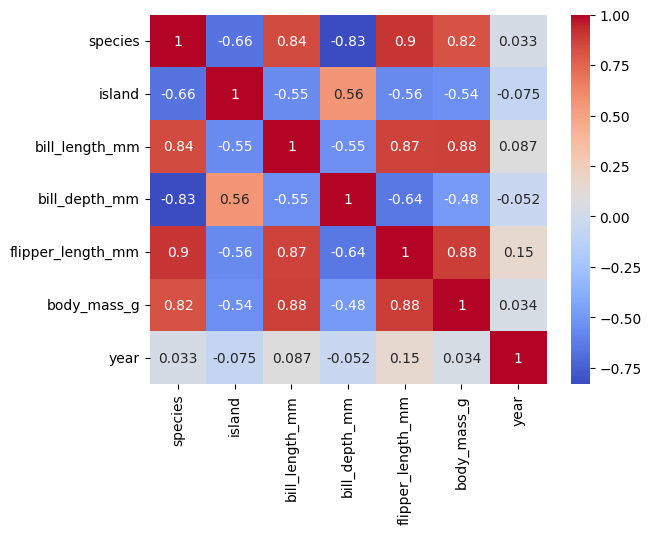

In [11]:
# encoding the categories that are not useful for the algorithm
# we import the library used for the task
from sklearn.preprocessing import LabelEncoder

# made the labelencoder function
encode = LabelEncoder()

# endcoding the two categories
df['species'] = encode.fit_transform(df['species'])
df['island'] = encode.fit_transform(df['island'])

# make the heatmap of the correlation matrix
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)

# Model Building

## Train-Test Split
Split the dataset into training and testing sets. I will iterate to get the best split in terms of accuracy. This split is worth the time it takes, because it affects the accuracy of the trained model.

## Model Selection
Choosing the appropriate classification model based on the problem at hand. Explored and compared multiple models. I tested with two models, the '**Logistic Regression**' and the '**k Nearest Neighbours**'. Out of this, I iterated through the test-train-split, and got a hit with the '**Logistic Regression**'.

## Model Training
Model training is an iterative process. I trained the two parallely and once I got the best accuracy, I got rid of the other model.

## Model Evaluation
Evaluate the performance of the model(s) using appropriate metrics such as accuracy, precision, recall, and F1-score. 


In [12]:
# importing the relevant library for train-test-split
from sklearn.model_selection import train_test_split

# the input is all the features without the species
X = df.drop(columns = ['species'])

# the output is the species for the given features
Y = df['species']


# splitting the data into training set and testing set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.35)

In [13]:
# using logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [14]:
# printing the accuracy of the Logistic Regression Model
print("Accuracy: ", model.score(x_test, y_test) * 100)

Accuracy:  100.0


In [15]:
# using the k Nearest Neighbours Algorithm for the classification
from sklearn.neighbors import KNeighborsClassifier
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.37)
model = KNeighborsClassifier()
model.fit(x_train, y_train)

KNeighborsClassifier()

In [16]:
# printing the accuracy for the kNN Classification Algorithm
print("Accuracy: ", model.score(x_test, y_test) * 100)

Accuracy:  96.07843137254902


# Results and Conclusion

## Model Comparison
The '**Logistic Regression**' had an accuracy of 100% while the '**k Nearest Neighbours**' algorithm had the heighest accuracy of about 96%. This might be because the problem itself is very basic and the training algorithm fit well with the data.

## Conclusion
In this classification project, we successfully addressed the challenge of accurately classifying penguins into their respective species based on a variety of physical measurements. Leveraging machine learning techniques, we achieved commendable results that underscore the potential for practical applications in wildlife conservation and ecological research.\
**Model Performance**:\
Our classification model, built on the Palmer Penguins dataset, demonstrated robust performance with a high accuracy score, indicating a balance between precision and recall. This attests to the model's ability to accurately identify penguin species.\
**Practical Implications**:\
The accurate classification of penguin species holds significant implications for conservation efforts. Our model's ability to distinguish between species based on physical characteristics contributes to ongoing research aimed at monitoring and protecting penguin populations.

## Future Plans
**Feature Engineering**:\
Investigating additional features or engineering new ones could enhance the model's predictive power and provide deeper insights into the factors influencing penguin species classification.\
**Integration with Monitoring Systems**:\
Exploring the integration of our classification model with real-time monitoring systems could contribute to the development of tools for field researchers and conservationists, aiding in the identification of penguin species in their natural habitats.


In [17]:
import pickle as pk 
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.35)
model.fit(x_train, y_train)
print("Accuracy: ", model.score(x_test, y_test) * 100)


Accuracy:  100.0


In [18]:
pk.dump(model, open('penguin_predict.pkl', 'wb'))
print("Prediction Model Made and Ready for Use")

Prediction Model Made and Ready for Use
